# Type Ia Supernovae

The `SNeIa` class is the built-in, ready-to-use transient for Type Ia Supernovae. A tutorial of how to use them is already in the "Transient" documentation. Here we show the default settings of this class.

***

The SNeIa Transient is already defined and ready to use:

In [4]:
import skysurvey

snia = skysurvey.SNeIa()

## Template

The default template is the SALT2 template, used to model the spectral evolution of the SNeIa.

In [49]:
snia.template

You can access the corresponding `sncosmo` source directly:

In [50]:
snia.template.source

<SALT2Source 'salt2' version='T23' at 0x138913ad0>

And its parameters names:

In [51]:
['z', 't0', 'x0', 'x1', 'c', 'mwebv', 'mwr_v']

['z', 't0', 'x0', 'x1', 'c', 'mwebv', 'mwr_v']

## Rate

Each pre-computed skysurvey transient has a default volumetric rate, that provide the number of transient expected per year and per Gpc³. The SNeIa rate is derived from Perley et al.(2020) (2020ApJ...904...35P).

In [6]:
snia.rate

23500.0

## Model

The model is based on the [modeldag](https://github.com/MickaelRigault/modeldag) package.

For the `SNeIa` class, the model contains 8 entries. So the generated data will contains at least 8 columns. To display the model, you can directly print the object:

In [14]:
snia

{'redshift': {'func': 'draw_redshift',
              'kwargs': {'zmax': 0.2, 'rate': 23500.0},
              'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x1388ff7e0>,
        'kwargs': {}},
 'c': {'func': <function SNeIaColor.intrinsic_and_dust at 0x1388ff740>,
       'kwargs': {}},
 't0': {'func': <bound method Generator.uniform of Generator(PCG64) at 0x13890D620>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x1388ff880>,
            'kwargs': {'x1': '@x1', 'c': '@c', 'mabs': -19.3, 'sigmaint': 0.1}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x138825e40>,
           'kwargs': {},
           'as': ['ra', 'dec']}}

Printing the model also show the color distribution, the stretch distribution and the absolute magnitude distribution by default.

## Color distribution



In `skysurvey`, the color distribution is implemented through the class `SNeIaColor`. This class provides several possible functions to model the observed color distribution of the SNeIa, and has a default color distribution.

### Default color distribution

The default color distribution is the `SNeIaColor.intrinsic_and_dust()`function, following Ginolin et al. (2025) (2025A&A...695A.140G). It combines a Gaussian distribution, that represents the intrinsic SN Ia color scatter, convoluted with an exponential decay, accounting for additional reddening due to the interstellar dust of the host galaxy such that:

\begin{equation*}
P(c) =
\begin{cases}
0, & \text{if } c \le 0 \\
\mathcal{N}(c | c_{\text{int}}, \sigma_c) \otimes \frac{1}{\tau} e^{-c/\tau}, & \text{if } c > 0
\end{cases}
\end{equation*}

The default parameters are:
- `c_int` = −0.075
- `σ_int` = 0.05
- `τ`  =  0.14


Let's see a simple visualization of the shape of the probability density function (PDF):

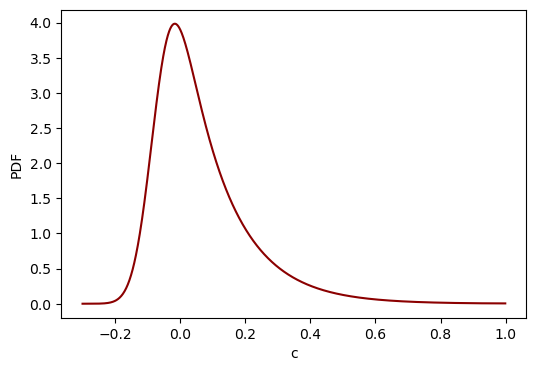

In [46]:
import matplotlib.pyplot as plt
from skysurvey.target.snia import SNeIaColor

xx, pdf = SNeIaColor.intrinsic_and_dust()
fig = plt.figure(figsize=[6,4])
plt.plot(xx, pdf, color="darkred")
plt.xlabel("c")
plt.ylabel("PDF")
plt.show()

### Stretch distribution

The stretch distribution `SNIaStretch.nicolas2021()` is implemented through the class `SNeIaStretch`, and is modeled using the two-component Gaussian model from Nicolas et al.(2021) (2021A&A...649A..74N),
which captures the mix of "prompt" and "delayed" SN Ia populations. 

This model mixes two normal distributions:

$$
P(x_1) = f_{\rm prompt} \, N(\mu_1, \sigma_1) + (1 - f_{\rm prompt}) \, \Big[ a \, N(\mu_1, \sigma_1) + (1 - a) \, N(\mu_2, \sigma_2) \Big]
$$

where:  

- The first mode $(\mu_1, \sigma_1)$ describes the prompt SNe Ia
- The second mode $(\mu_2, \sigma_2)$ describes the delayed SNe Ia
- The `a` parameter is the relative influence of both modes (1 or 2) in the delayed environment. `a>0.5` means more mode 1.
- The `f_prompt` parameter is the fraction of prompt SNe Ia

The default parameter are:
- `μ_1` = 0.33
- `σ_1` = 0.64
- `μ_2` = −1.50	
- `σ_2` = 0.58	
- `a` = 0.45
- `f_prompt` = 0.5

Optionally, the parameter `f_prompt` can depend on redshift, but if no redshift is passed, `f_prompt` = 0.5 is used as a constant default.

### Absolute magnitude

The default absolute magnitude distribution `SNeIaMagnitude.tripp1998()` is computed following the Tripp et al.(1998) (1998A&A...331..815T) relation, with the following default parameters:
- `mabs` (average absolute magnitude)= -19.3
- `σ_int` = 0.10
- `α` = -0.14
- `β` = 3.15

You can also include host-mass corrections with the alternative absolute magnitude distribution that includes the mass step:

```python
from skysurvey.target.snia import SNeIaMagnitude
SNeIaMagnitude.tripp_and_massstep(x1, c, hostmass)
```

For which the default parameters are:
-  `mabs` = -19.3, 
- `σ_int` = 0.10
- `α` = -0.14
- `β` = 3.15
- `γ` (step's amplitude) = 0.1
- `split` (host mass boundary between low-mass and high-mass hosts) = 10


